In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Telco_Customer_Churn.csv')

# Written Analysis.

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


I notice there are alot of non-numerical columns, will need to encode most of the labels so i can feed the model appropriately

1- First insight: Data needs encoding

2- There is an unimportant -> customerID

3- There are no null values in the whole dataset.

4- the total charges column should be a float64 column , object Dtype is incorrect for the stored data in the dataset

In [6]:
df.drop('customerID', axis=1, inplace=True)

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df['gender'].value_counts()
#The gender is looking balanced and there is no bias towards 1 gender in the dataset.

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [9]:
df['Churn'].value_counts()
# I notice a 3:1 ratio between the target column outcomes is not well balanced. I might need to resample the data to balance the target column.

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [10]:
# I fixed the Dtype for the totalCharges column so i can view the describtion for the numeric data of my dataset.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()
# I have 11 missing values in the TotalCharges column.

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df.describe()
# I notice some zero values which could be incorrect since this is a customers dataset,
# which means any customer must have atleast 1 month of tenure , so zero is  not a correct value in any row for tenure probably,
# I assume 0 tenure is a mistake so i will just replace it with the median value of the tenure column.


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df['tenure'].replace(0, df['tenure'].median(), inplace=True)
df.describe()

C:\Users\AhmadJerjees\AppData\Local\Temp\ipykernel_3140\2296177579.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tenure'].replace(0, df['tenure'].median(), inplace=True)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.416442,64.761692,2283.300441
std,0.368612,24.526454,30.090047,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
# For these values i know how to calculate the TotalCharge by multiplying the MonthlyCharges by the tenure.
df['TotalCharges'].fillna(df['MonthlyCharges']*df['tenure'], inplace=True)
df.isnull().sum()

C:\Users\AhmadJerjees\AppData\Local\Temp\ipykernel_3140\1055730692.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['MonthlyCharges']*df['tenure'], inplace=True)


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.describe()
# The description for the seniorCitizen Column is not needed, since it's a categorical column.
# But I notice the other 3 columns have high Std deviation, which means the data is spread out and not close to the mean. I will need to scale them later on.


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.416442,64.761692,2281.610266
std,0.368612,24.526454,30.090047,2265.553112
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.300000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


5- Fifth Insight : Data needs scaling



In [15]:
DeviatedColumns = ['tenure', 'MonthlyCharges', 'TotalCharges']


## Visual Analysis

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

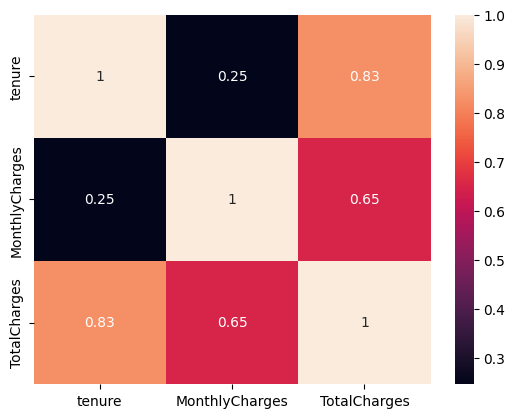

In [ ]:
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True)
# No important insights from the heatmap can be told, since the correlation is already known from the dataset description with common sense.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


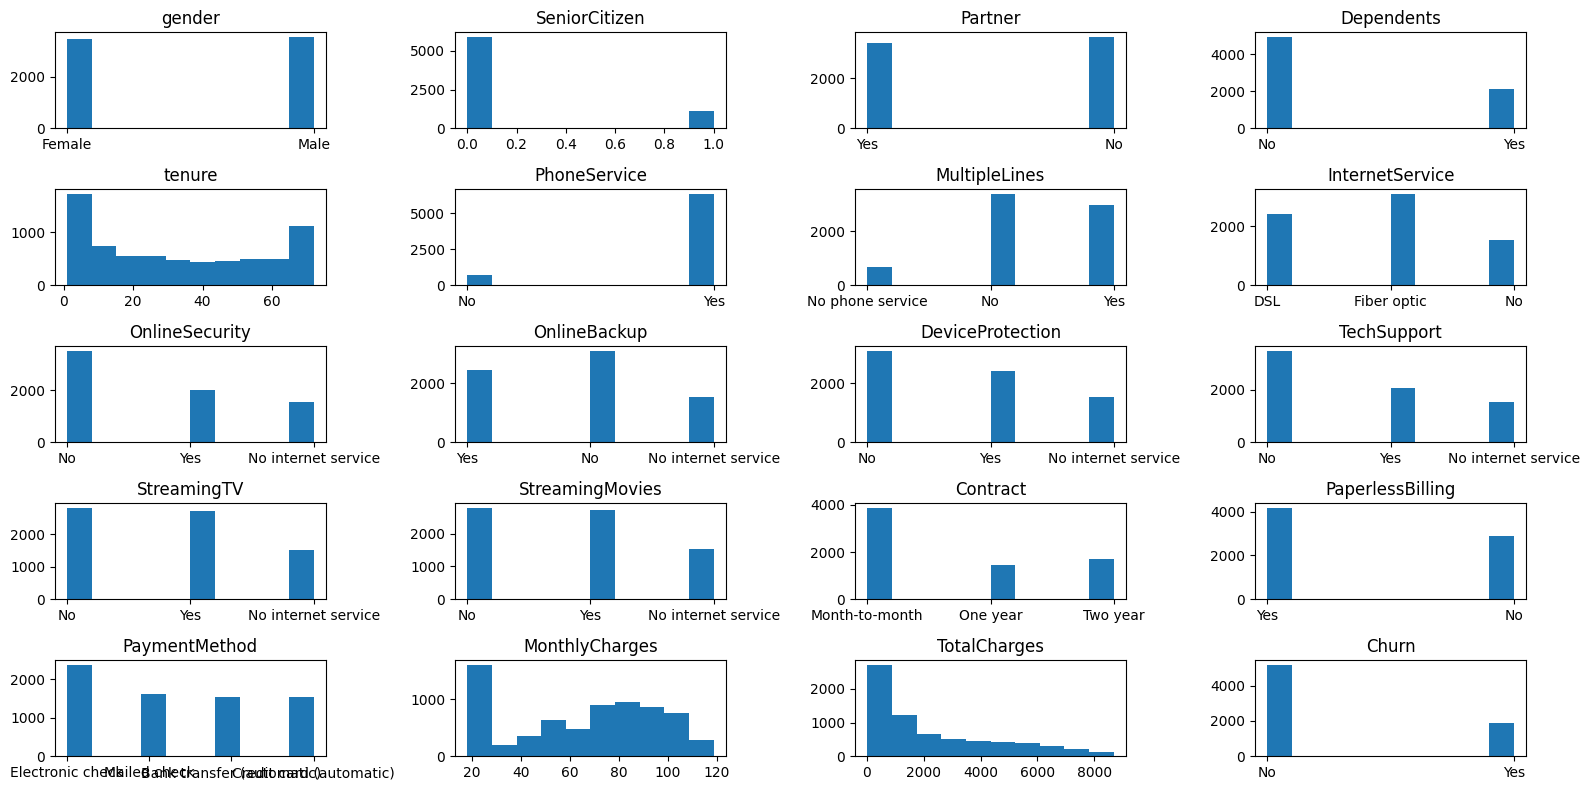

In [ ]:
fig,ax = plt.subplots(5,4, figsize=(16,8))

ax[0,0].title.set_text('gender') 
ax[0,0].hist(df['gender'])

ax[0,1].title.set_text('SeniorCitizen') 
ax[0,1].hist(df['SeniorCitizen'])

ax[0,2].title.set_text('Partner') 
ax[0,2].hist(df['Partner'])

ax[0,3].title.set_text('Dependents') 
ax[0,3].hist(df['Dependents'])

ax[1,0].title.set_text('tenure') 
ax[1,0].hist(df['tenure'])

ax[1,1].title.set_text('PhoneService') 
ax[1,1].hist(df['PhoneService'])

ax[1,2].title.set_text('MultipleLines') 
ax[1,2].hist(df['MultipleLines'])

ax[1,3].title.set_text('InternetService') 
ax[1,3].hist(df['InternetService'])

ax[2,0].title.set_text('OnlineSecurity') 
ax[2,0].hist(df['OnlineSecurity'])

ax[2,1].title.set_text('OnlineBackup') 
ax[2,1].hist(df['OnlineBackup'])

ax[2,2].title.set_text('DeviceProtection') 
ax[2,2].hist(df['DeviceProtection'])

ax[2,3].title.set_text('TechSupport') 
ax[2,3].hist(df['TechSupport'])

ax[3,0].title.set_text('StreamingTV') 
ax[3,0].hist(df['StreamingTV'])

ax[3,1].title.set_text('StreamingMovies') 
ax[3,1].hist(df['StreamingMovies'])

ax[3,2].title.set_text('Contract') 
ax[3,2].hist(df['Contract'])

ax[3,3].title.set_text('PaperlessBilling') 
ax[3,3].hist(df['PaperlessBilling'])

ax[4,0].title.set_text('PaymentMethod') 
ax[4,0].hist(df['PaymentMethod'])

ax[4,1].title.set_text('MonthlyCharges') 
ax[4,1].hist(df['MonthlyCharges'])

ax[4,2].title.set_text('TotalCharges') 
ax[4,2].hist(df['TotalCharges'])

ax[4,3].title.set_text('Churn') 
ax[4,3].hist(df['Churn'])

plt.tight_layout()
plt.show()

In [23]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [24]:
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

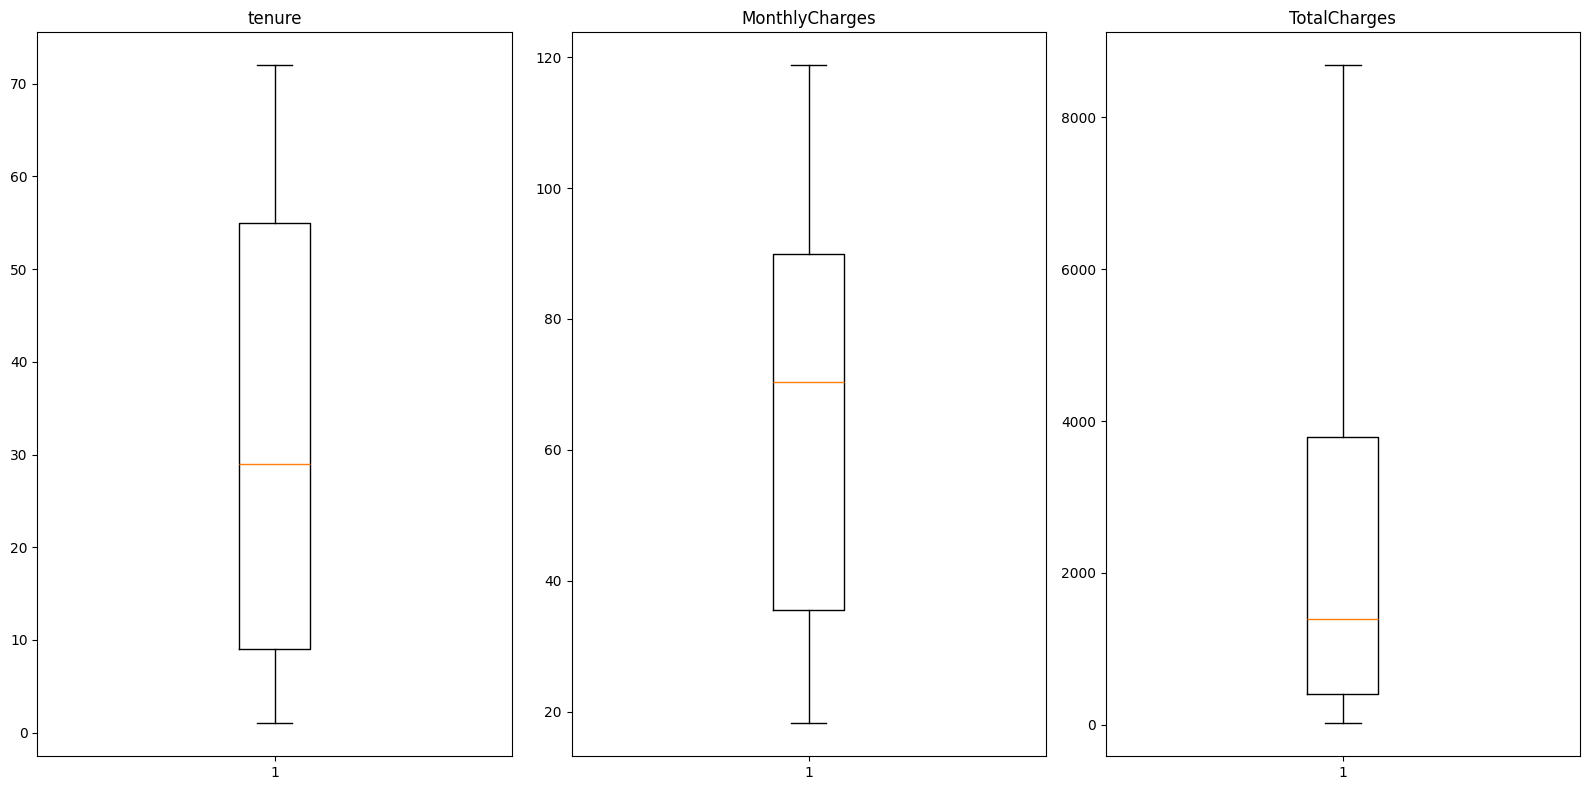

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(16,8))

ax[0].title.set_text('tenure')
ax[0].boxplot(df['tenure'])

ax[1].title.set_text('MonthlyCharges')
ax[1].boxplot(df['MonthlyCharges'])

ax[2].title.set_text('TotalCharges')
ax[2].boxplot(df['TotalCharges'])

plt.tight_layout()
plt.show()

# Apparently there are no outliers in the dataset.